# Building of Deep Neural Network using Numpy, Pytorch and Tensorflow
<img src="images/DNN_flow.png" style="width:800px;height:500px;">
<caption><center> Figure 1 : Flow for Constructing a Deep Neural Network</center></caption><br>

Notebook for implementation of linear (dense) deep neural network using:
1. Numpy : Uses CPU resources for implementation
2. Pytorch : Uses GPU resources for implementation
3. Tensorflow : Uses GPU resources for implementation

Global variables used in this notebook. Notebook presented in a flat structure for understanding of workings of the DNN implementation.

Codes in each step are broken down into 5 cells:
1. Cell 1 : Hyper-parameters, parameters to be intialized for each step
2. Cell 2 : Function call for Numpy
3. Cell 3 : Function call for pytorch
4. Cell 4 : Function call for tensorflow
5. Cell 5 : Execute function calls

# Step 0 : Import Libraries, Create dataset for DNN implementation

Value of m = 800, Shape X_test = (2, 200), Shape X = (2, 800)



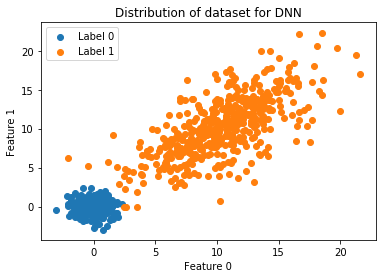

In [76]:
# Import libraries
import numpy as np
import torch
import tensorflow as tf
from matplotlib import pyplot as plt

# Create and visualize dataset
m = 1000     # m = total number of samples (set to even number)
n = 2      # n = number of features of input. 2 implies 2 dimensional (2D)


# Creation of dataset for Y = 0
angles = np.arange(0, 360, 360 / (m//2))   # Half the sample will be Y=0
amp_X0 = np.random.randn(m//2)
X0 = np.zeros((n+1, m//2))
X0[0] = np.sin(angles * np.pi/180) * amp_X0
X0[1] = np.cos(angles * np.pi/180) * amp_X0
X0[2] = np.zeros((m//2))
# print('X0 shape = {}, X0 = \n{}\n'.format(X0.shape, X0))

# Creation of dataset for Y = 1
angles = np.arange(0, 360, 360 / (m - m//2))
amp_X1 = np.random.randn((m - m//2))*3
X1 = np.zeros((n+1, (m - m//2)))
X1[0] = np.sin(angles * np.pi/180) * amp_X1 + amp_X0*3 + 10
X1[1] = np.cos(angles * np.pi/180) * amp_X1 + amp_X0*3 + 10
X1[2] = np.ones(((m - m//2)))
# print('X1 shape = {}, X1 = \n{}\n'.format(X1.shape, X1))

# Combine and shuffle arrays
X = np.concatenate((X0, X1),axis=1)
X = X.T
np.random.shuffle(X)    # Shuffle only works on axis=0, thus need the X.T before and after
X = X.T
Y = X[2:]
X = X[0:2]

# Visualize dataset with plot
plt.scatter(X0[0],X0[1])
plt.scatter(X1[0],X1[1])
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Label 0', 'Label 1'])
plt.title('Distribution of dataset for DNN')

# Remove 20% of the dataset to be reserved for testing
X_test = X[:,int(np.floor(0.8*m)):]
Y_test = Y[:,int(np.floor(0.8*m)):]
X = X[:,:int(np.floor(0.8*m))]
Y = Y[:,:int(np.floor(0.8*m))]
m = Y.shape[1]
print('Value of m = {}, Shape X_test = {}, Shape X = {}\n'.format(m, X_test.shape, X.shape))

# Step 1: Initialize the Parameters
Initialize the parameters (weights (W) and bias (b)) for the DNN implementation in all 3 libraries. 
1. init_model_numpy() 
2. init_model_torch()
3. init_model_tf()

<img src="images/initialization.png" style="width:800px;height:500px;">
<caption><center> Figure 2 : Initialize the Parameters</center></caption><br>

In [126]:
# Hyper-parameters definition
L = 4                 # Total number of layers defined to be 4
nl = [56, 128, 56, 1]

# Codes to include input features as layer 0 nodes of DNN
n_l = [n] 
n_l.extend(nl)

In [127]:
def init_model_numpy(db_prt = 0):
    # Numpy initialization of weights and bias
    global W_numpy, b_numpy
    W_numpy = [0]
    b_numpy = [0]
    for i in range(1, len(n_l)):
        W_numpy_temp = np.random.randn(n_l[i], n_l[i-1]) * 0.01    # Multiply by a small number 0.01 to reduce the value of z, to speed up learning (esp for sigmoid activation)
        W_numpy.append(W_numpy_temp)

        b_numpy_temp = np.ones((n_l[i], 1)) * 0.01   # Add a small bias to prevent divide by 0 operation
        b_numpy.append(b_numpy_temp)
        
    if db_prt == 1: 
        print('Shapes of W_numpy are: {}, {}, {}, {}'.format(W_numpy[1].shape, W_numpy[2].shape, W_numpy[3].shape, W_numpy[4].shape))
        print('Shapes of b_numpy are: {}, {}, {}, {}\n'.format(b_numpy[1].shape, b_numpy[2].shape, b_numpy[3].shape, b_numpy[4].shape))

In [128]:
def init_model_torch(db_prt = 0):
    ## Pytorch initialization of weights and bias
    global W_torch, b_torch
    W_torch = [0]
    b_torch = [0]
    for i in range(1, len(W_numpy)):    # Convert the numpy array to torch
        W_torch.append(torch.tensor(W_numpy[i]))
        b_torch.append(torch.tensor(b_numpy[i]))
        
    if db_prt == 1:
        print('Shapes of W_torch are: {}, {}, {}, {}'.format(W_torch[1].shape, W_torch[2].shape, W_torch[3].shape, W_torch[4].shape))
        print('Shapes of b_torch are: {}, {}, {}, {}\n'.format(b_torch[1].shape, b_torch[2].shape, b_torch[3].shape, b_torch[4].shape))


In [129]:
def init_model_tf(db_prt = 0):
    ## Tensorflow initialization of weights and bias
    global W_tf, b_tf
    W_tf = [0]
    b_tf = [0]
    for i in range(1, len(W_numpy)):    # Convert the numpy array to torch
        W_tf.append(tf.convert_to_tensor(W_numpy[i]))
        b_tf.append(tf.convert_to_tensor(b_numpy[i]))
    
    if db_prt == 1:
        print('Shapes of W_tf are: {}, {}, {}, {}'.format(W_tf[1].shape, W_tf[2].shape, W_tf[3].shape, W_tf[4].shape))
        print('Shapes of b_tf are: {}, {}, {}, {}\n'.format(b_tf[1].shape, b_tf[2].shape, b_tf[3].shape, b_tf[4].shape))

In [130]:
# Initialize parameters by calling the respective function calls
init_model_numpy()   # Numpy init model
init_model_torch()   # pytorch init model
init_model_tf()      # tensorflow init model

# Step 2: Perform Forward Pass
<img src="images/forward_pass.png" style="width:800px;height:500px;">
<caption><center> Figure 3 : Perform forward pass </center></caption><br>

Note:
- For all hidden layers, ReLU activation function is used
- For last layer (i.e. output layer), Sigmoid activation function is used
- Cross Entropy Loss is used as the Cost function

In [82]:
# Hyper-parameters definition

In [165]:
def forward_numpy(X, Y, W_numpy, b_numpy, db_prt = 0): 
    # Numpy forward pass
    # Definition of sigmoid and relu function for numpy
    def sigmoid(Z):
        return 1 / (1 + np.exp(-Z))

    def relu(Z):
        return np.maximum(Z,0)

    Z_numpy = [0]
    A_numpy = [X]
    Y_numpy = Y
    for i in range(1, len(n_l)):
        Z_temp = np.matmul(W_numpy[i],A_numpy[i-1]) + b_numpy[i]
        Z_numpy.append(Z_temp)
        if i != len(n_l):
            A_temp = relu(Z_temp)   # ReLU activation for all hidden layers
            A_numpy.append(A_temp) 
        else:
            A_temp = sigmoid(Z_temp)  # Sigmoid activation for last (output) layer. Binary classification
            A_numpy.append(A_temp)   

#     assert( (A_numpy[L] < 0).any()), print(A_numpy[L])
#     assert( (1 - A_numpy[L] < 0).any()), print(1 - A_numpy[L])
    J_numpy = (-1)*np.sum(Y_numpy*np.log(A_numpy[L]) + (1-Y_numpy)*np.log(1-A_numpy[L]))/m	
    
    return Z_numpy, A_numpy, Y_numpy, J_numpy

In [84]:
def forward_torch(X, Y, W_torch, b_torch, db_prt = 0): 
    # Pytorch forward pass
    Z_torch = [0]
    A_torch = [torch.tensor(X)]
    Y_torch = torch.tensor(Y)
    sigmoid = torch.nn.Sigmoid()    # Use sigmoid definition from pytorch nn library
    relu = torch.nn.ReLU()          # Use ReLU definition from pytorch nn library
    for i in range(1, len(n_l)):
        Z_temp = torch.matmul(W_torch[i],A_torch[i-1]) + b_torch[i]
        Z_torch.append(Z_temp)
        if i != len(n_l):
            A_temp = relu(Z_temp)   # ReLU activation for all hidden layers
            A_torch.append(A_temp) 
        else:
            A_temp = sigmoid(Z_temp)  # Sigmoid activation for last (output) layer. Binary classification
            A_torch.append(A_temp)   
    J_torch = (-1)*torch.sum(Y_torch*torch.log(A_torch[L]) +  (1-Y_torch)*torch.log(1-A_torch[L]))/m
    
    return Z_torch, A_torch, Y_torch, J_torch

In [85]:
def forward_tf(X, Y, W_tf, b_tf, db_prt = 0): 
    # Tensorflow forward pass
    Z_tf = [0]
    A_tf = [tf.convert_to_tensor(X)]
    Y_tf = tf.convert_to_tensor(Y)
    for i in range(1, len(n_l)):
    #     print(W_tf[i].shape, A_tf[i-1].shape, tf.matmul(W_tf[i],A_tf[i-1]).shape)

        Z_temp = tf.matmul(W_tf[i],A_tf[i-1]) + b_tf[i]
        Z_tf.append(Z_temp)
        if i != len(n_l):
            A_temp = tf.keras.activations.relu(Z_temp)   # ReLU activation for all hidden layers
            A_tf.append(A_temp) 
        else:
            A_temp = tf.keras.activations.sigmoid(Z_temp)  # Sigmoid activation for last (output) layer. Binary classification
            A_tf.append(A_temp)  
    J_tf = (-1)*tf.math.reduce_sum(Y_tf*tf.math.log(A_tf[L]) +  (1-Y_tf)*tf.math.log(1-A_tf[L]))/m
    
    return Z_tf, A_tf, Y_tf, J_tf

In [86]:
# Perform forward pass on all 3 models
Z_numpy, A_numpy, Y_numpy, J_numpy = forward_numpy(X, Y, W_numpy, b_numpy)
Z_torch, A_torch, Y_torch, J_torch = forward_torch(X, Y, W_torch, b_torch)
Z_tf, A_tf, Y_tf, J_tf = forward_tf(X, Y, W_tf, b_tf)

# Get Cost from all models
print('\nCost calculated from numpy, pytorch and tensorflow are {}, {} and {}'.format(J_numpy, J_torch, J_tf))


Cost calculated from numpy, pytorch and tensorflow are 3.478830348985075, 3.478830348985075 and 3.478830348985075


# Step 3: Perform Backward Pass
<img src="images/backward_pass.png" style="width:800px;height:500px;">
<caption><center> Figure 4 : Perform backward pass </center></caption><br>

In [87]:
def backward_numpy(db_prt = 0):
    global dA_numpy, dZ_numpy, dW_numpy, db_numpy
    
    # Numpy backward pass
    dA_numpy = []
    dZ_numpy = []
    dW_numpy = []
    db_numpy = []

    # For last (output) layer
    dAL = - (np.divide(Y_numpy, A_numpy[L]) - np.divide(1 - Y_numpy, 1 - A_numpy[L]))   # Find grad of last activation layer due to CEL cost function
    dZ_temp = dAL * A_numpy[L] * (1 - A_numpy[L])    # Backward function for sigmoid activation
    dW_temp = np.matmul(dZ_temp, A_numpy[L-1].T) / m
    db_temp = np.sum(dZ_temp, axis=1, keepdims=True)/m
    dA_numpy.append(dAL)
    dZ_numpy.append(dZ_temp)
    dW_numpy.append(dW_temp)
    db_numpy.append(db_temp)

    # For all other layers
    for i in reversed(range(1, L)):
        dA_temp = np.matmul(W_numpy[i+1].T,dZ_numpy[-1])	
        dZ_temp = np.array(dA_temp, copy=True)         # Backward pass for ReLU, step 1: copy array
        dZ_temp[Z_numpy[i] <= 0] = 0                   # Backward pass for ReLU, step 2: Set all dZ=0 where Z < 0
        dW_temp = np.matmul(dZ_temp, A_numpy[i-1].T) / m
        db_temp = np.sum(dZ_temp, axis=1, keepdims=True)/m
        dA_numpy.append(dA_temp)
        dZ_numpy.append(dZ_temp)
        dW_numpy.append(dW_temp)
        db_numpy.append(db_temp)


    # Reverse the list so that indexes are respective to layer number.
    # This is so as for backward pass, all calculations are done from last layer to first layer
    dA_numpy.append(0)    # Append addition 0 so that after reverse, dA0 correspond to A0 with same dimension
    dZ_numpy.append(0)
    dW_numpy.append(0)
    db_numpy.append(0)
    dA_numpy = list(reversed(dA_numpy))
    dZ_numpy = list(reversed(dZ_numpy))
    dW_numpy = list(reversed(dW_numpy))
    db_numpy = list(reversed(db_numpy))

In [88]:
def backward_torch(db_prt = 0):
    # Pytorch backward pass
    global dA_torch, dZ_torch, dW_torch, db_torch
    
    dA_torch = []
    dZ_torch = []
    dW_torch = []
    db_torch = []

    # For last (output) layer
    dAL = - (torch.div(Y_torch, A_torch[L]) - torch.div(1 - Y_torch, 1 - A_torch[L]))   # Find grad of last activation layer due to CEL cost function
    dZ_temp = dAL * A_torch[L] * (1 - A_torch[L])    # Backward function for sigmoid activation
    dW_temp = torch.matmul(dZ_temp, A_torch[L-1].T) / m
    db_temp = torch.sum(dZ_temp, dim=1, keepdim=True)/m
    dA_torch.append(dAL)
    dZ_torch.append(dZ_temp)
    dW_torch.append(dW_temp)
    db_torch.append(db_temp)

    # For all other layers
    for i in reversed(range(1, L)):
        dA_temp = torch.matmul(W_torch[i+1].T,dZ_torch[-1])	
        dZ_temp = dA_temp.clone()                      # Backward pass for ReLU, step 1: copy array
        dZ_temp[Z_torch[i] <= 0] = 0                   # Backward pass for ReLU, step 2: Set all dZ=0 where Z < 0
        dW_temp = torch.matmul(dZ_temp, A_torch[i-1].T) / m
        db_temp = torch.sum(dZ_temp, dim=1, keepdim=True)/m
        dA_torch.append(dA_temp)
        dZ_torch.append(dZ_temp)
        dW_torch.append(dW_temp)
        db_torch.append(db_temp)

    # Reverse the list so that indexes are respective to layer number.
    # This is so as for backward pass, all calculations are done from last layer to first layer
    dA_torch.append(0)    # Append addition 0 so that after reverse, dA0 correspond to A0 with same dimension
    dZ_torch.append(0)
    dW_torch.append(0)
    db_torch.append(0)
    dA_torch = list(reversed(dA_torch))
    dZ_torch = list(reversed(dZ_torch))
    dW_torch = list(reversed(dW_torch))
    db_torch = list(reversed(db_torch))

In [89]:
def backward_tf(db_prt = 0):
    # Tensorflow backward pass
    global dA_tf, dZ_tf, dW_tf, db_tf
    
    dA_tf = []
    dZ_tf = []
    dW_tf = []
    db_tf = []

    # For last (output) layer
    dAL = - (tf.math.divide(Y_tf, A_tf[L]) - tf.math.divide(1 - Y_tf, 1 - A_tf[L]))   # Find grad of last activation layer due to CEL cost function
    dZ_temp = dAL * A_tf[L] * (1 - A_tf[L])    # Backward function for sigmoid activation
    dW_temp = tf.matmul(dZ_temp, tf.transpose(A_tf[L-1])) / m
    db_temp = tf.math.reduce_sum(dZ_temp, axis=1, keepdims=True)/m
    dA_tf.append(dAL)
    dZ_tf.append(dZ_temp)
    dW_tf.append(dW_temp)
    db_tf.append(db_temp)

    # For all other layers
    for i in reversed(range(1, L)):
        dA_temp = tf.matmul(tf.transpose(W_tf[i+1]),dZ_tf[-1])	
        dZ_temp = tf.identity(dA_temp)                     # Backward pass for ReLU, step 1: copy array
        dZ_temp = tf.where(Z_tf[i] > 0. , dZ_temp , [0])
        dW_temp = tf.matmul(dZ_temp, tf.transpose(A_tf[i-1])) / m
        db_temp = tf.math.reduce_sum(dZ_temp, axis=1, keepdims=True)/m
        dA_tf.append(dA_temp)
        dZ_tf.append(dZ_temp)
        dW_tf.append(dW_temp)
        db_tf.append(db_temp)

    # Reverse the list so that indexes are respective to layer number.
    # This is so as for backward pass, all calculations are done from last layer to first layer
    dA_tf.append(0)    # Append addition 0 so that after reverse, dA0 correspond to A0 with same dimension
    dZ_tf.append(0)
    dW_tf.append(0)
    db_tf.append(0)
    dA_tf = list(reversed(dA_tf))
    dZ_tf = list(reversed(dZ_tf))
    dW_tf = list(reversed(dW_tf))
    db_tf = list(reversed(db_tf))

In [124]:
# Perform backward pass on all 3 models
backward_numpy()
backward_torch()
backward_tf()

# Quick check to verify shapes are correct
print('dW_numpy[1].shape and W_numpy[1].shape are {} and {}\n'.format(dW_numpy[1].shape, W_numpy[1].shape))
print('dW_torch[1].shape and W_torch[1].shape are {} and {}\n'.format(dW_torch[1].shape, W_torch[1].shape))
print('dW_tf[1].shape and W_tf[1].shape are {} and {}\n'.format(dW_tf[1].shape, W_tf[1].shape))

dW_numpy[1].shape and W_numpy[1].shape are (56, 2) and (56, 2)

dW_torch[1].shape and W_torch[1].shape are torch.Size([56, 2]) and torch.Size([56, 2])

dW_tf[1].shape and W_tf[1].shape are (56, 2) and (56, 2)



# Step 4: Update Parameters
<img src="images/update_params.png" style="width:800px;height:500px;">
<caption><center> Figure 5 : Update Parameters </center></caption><br>

In [91]:
# Hyper-parameters definition
learn_rate = 0.01

In [92]:
def update_numpy():
    # Numpy update
    for i in range(1,L+1):
        W_numpy[i] = W_numpy[i] - learn_rate*dW_numpy[i]
        b_numpy[i] = b_numpy[i] - learn_rate*db_numpy[i]

In [93]:
def update_torch():
    # Pytorch update
    for i in range(1,L+1):
        W_torch[i] = W_torch[i] - learn_rate*dW_torch[i]
        b_torch[i] = b_torch[i] - learn_rate*db_torch[i]

In [94]:
def update_tf():
    # Tensorflow update
    for i in range(1,L+1):
        W_tf[i] = W_tf[i] - learn_rate*dW_tf[i]
        b_tf[i] = b_tf[i] - learn_rate*db_tf[i]

In [95]:
# Update parameters
update_numpy()
update_torch()
update_tf()

# Step 5: Perform prediction on model and calculate accuracy
The first cell performs step 2 : forward pass to get the predicted y label based on the learnt weights, W and bias, b. 

Subsequent cells to calculate the accuracy of the prediction.

Note that the prediction will be highly not accurate if this step is executed before a number of epoch of training on the train data. 

In [106]:
# This cell uses the foward function defined in Step 2. 
# The test dataset is passed through the forward function to obtain the activation using the learnt weights and bias.

# Numpy predicted label in A_test_numpy
_, A_test_numpy, Y_test_numpy, J_test_numpy = forward_numpy(X_test, Y_test, W_numpy, b_numpy)

# Pytorch predicted label in A_test_torch
_, A_test_torch, Y_test_torch, J_test_torch = forward_torch(X_test, Y_test, W_torch, b_torch)

# Tensorflow predicted label in A_test_tf
_, A_test_tf, Y_test_tf, J_test_tf = forward_tf(X_test, Y_test, W_tf, b_tf)


# Print output
print('\nLoss function calculated from numpy, pytorch and tensorflow are {}, {} and {}'.format(J_test_numpy, J_test_torch, J_test_tf))


Loss function calculated from numpy, pytorch and tensorflow are 0.6060954794874936, 0.6060954794874936 and 0.6060954794874938


In [107]:
def predict_numpy(A_test_numpy_L, Y_test_numpy):
    # Numpy prediction
    predicted_numpy = A_test_numpy_L.round()
    accuracy_numpy = np.count_nonzero(predicted_numpy == Y_test_numpy) / Y_test_numpy.shape[1] * 100
    return accuracy_numpy, predicted_numpy

In [108]:
def predict_torch(A_test_torch_L, Y_test_torch):
    # Pytorch prediction
    predicted_torch = A_test_torch_L.round()
    accuracy_torch = torch.sum(predicted_torch == Y_test_torch) / float(Y_test_torch.shape[1]) * 100
    return accuracy_torch, predicted_torch

In [109]:
def predict_tf(A_test_tf_L, Y_test_tf):
    # Tensorflow prediction
    predicted_tf = tf.math.round(A_test_tf_L)
    accuracy_tf = tf.reduce_sum(tf.cast(predicted_tf == Y_test_tf, tf.float32)) / Y_test_tf.shape[1] * 100
    return accuracy_tf, predicted_tf

Accuracy of numpy, pytorch and tensorflow prediction are 52.5%, 52.499996185302734% and 52.499996185302734%respectively



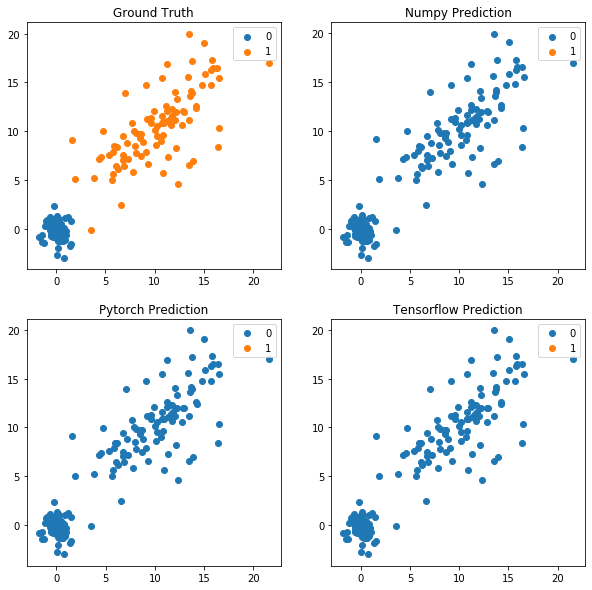

In [110]:
# Get prediction and plot out the prediction
accuracy_numpy, predicted_numpy = predict_numpy(A_test_numpy[L], Y_test_numpy)
accuracy_torch, predicted_torch = predict_torch(A_test_torch[L], Y_test_torch)
accuracy_tf, predicted_tf = predict_tf(A_test_tf[L], Y_test_tf)

print('Accuracy of numpy, pytorch and tensorflow prediction are {}%, {}% and {}%respectively\n'.format(accuracy_numpy, accuracy_torch, accuracy_tf))


# Get plot
def plot_prediction(X_test, Y_test, predicted_numpy, predicted_torch, predicted_tf):
    # Plot test data and prediction
    
    # Ground Truth
    X0_test = X_test[:,Y_test[0,:] == 0]
    X1_test = X_test[:,Y_test[0,:] == 1]

    # Numpy prediction
    X0_numpy = X_test[:,predicted_numpy[0,:] == 0]
    X1_numpy = X_test[:,predicted_numpy[0,:] == 1]

    # Torch prediction
    X0_torch = X_test[:,predicted_torch[0,:] == 0]
    X1_torch = X_test[:,predicted_torch[0,:] == 1]

    # Tensorflow prediction
    X0_tf = X_test[:,predicted_tf[0,:] == 0]
    X1_tf = X_test[:,predicted_tf[0,:] == 1]


    # Ground Truth
    plt.figure(figsize=(10, 10))

    plt.subplot(2, 2, 1)
    plt.scatter(X0_test[0], X0_test[1])
    plt.scatter(X1_test[0], X1_test[1])
    plt.legend(['0', '1'])
    plt.title('Ground Truth')

    # Numpy Prediction
    plt.subplot(2, 2, 2)
    plt.scatter(X0_numpy[0], X0_numpy[1])
    plt.scatter(X1_numpy[0], X1_numpy[1])
    plt.legend(['0', '1'])
    plt.title('Numpy Prediction')

    # Pytorch Prediction
    plt.subplot(2, 2, 3)
    plt.scatter(X0_torch[0], X0_torch[1])
    plt.scatter(X1_torch[0], X1_torch[1])
    plt.legend(['0', '1'])
    plt.title('Pytorch Prediction')

    # Tensorflow Prediction
    plt.subplot(2, 2, 4)
    plt.scatter(X0_tf[0], X0_tf[1])
    plt.scatter(X1_tf[0], X1_tf[1])
    plt.legend(['0', '1'])
    plt.title('Tensorflow Prediction')
    
plot_prediction(X_test, Y_test, predicted_numpy, predicted_torch, predicted_tf)

# Step 6: Repeat steps 2 to 5 with a certain number of epoch to learn the relation

In [180]:
# Set hyper parameters for learning
EPOCH = 100

# Import time library
import time

In [171]:
def learn_numpy():
    # Learn for numpy 
    t_start = time.time()
    print('Start model training in numpy')
    
    init_model_numpy()
    for i in range(1, EPOCH+1):
        print('.'.format(i), end='')
        Z_numpy, A_numpy, Y_numpy, J_numpy = forward_numpy(X, Y, W_numpy, b_numpy)
        backward_numpy()
        update_numpy()
    
    # Get training results
    _, A_test_numpy, Y_test_numpy, J_test_numpy = forward_numpy(X_test, Y_test, W_numpy, b_numpy)
    accuracy_numpy, predicted_numpy = predict_numpy(A_test_numpy[L], Y_test_numpy)
    print('\nAccuracy = {}, Train Loss = {}, Test Loss = {}'.format(accuracy_numpy, J_numpy, J_test_numpy), end = '\n')
    t_end = time.time()
    print('Total elapsed time for numpy implementation = {} ms\n'.format((t_end-t_start)*100))

In [142]:
def learn_torch():
    # Learn for pytorch 
    t_start = time.time()
    print('Start model training in pytorch')
    
    init_model_torch()
    for i in range(1, EPOCH+1):
        print('.'.format(i), end='')
        Z_torch, A_torch, Y_torch, J_torch = forward_torch(X, Y, W_torch, b_torch)
        backward_torch()
        update_torch()
    
    # Get training results
    _, A_test_torch, Y_test_torch, J_test_torch = forward_torch(X_test, Y_test, W_torch, b_torch)
    accuracy_torch, predicted_torch = predict_torch(A_test_torch[L], Y_test_torch)
    print('\nAccuracy = {}, Train Loss = {}, Test Loss = {}'.format(accuracy_torch, J_torch, J_test_torch), end = '\n')
    t_end = time.time()
    print('Total elapsed time for pytorch implementation = {} ms\n'.format((t_end-t_start)*100))

In [154]:
def learn_tf():
    # Learn for tensorflow
    t_start = time.time()
    print('Start model training in tensorflow')
    
    init_model_tf()
    for i in range(1, EPOCH+1):
        print('.'.format(i), end='')
        Z_tf, A_tf, Y_tf, J_tf = forward_tf(X, Y, W_tf, b_tf)
        backward_tf()
        update_tf()
    
    # Get training results
    _, A_test_tf, Y_test_tf, J_test_tf = forward_tf(X_test, Y_test, W_tf, b_tf)
    accuracy_tf, predicted_tf = predict_tf(A_test_tf[L], Y_test_tf)
    print('\nAccuracy = {}, Train Loss = {}, Test Loss = {}'.format(accuracy_tf, J_tf, J_test_tf), end = '\n')
    t_end = time.time()
    print('Total elapsed time for pytorch implementation = {} ms\n'.format((t_end-t_start)*100))

Start model training in pytorch
....................................................................................................
Accuracy = 47.5, Train Loss = nan, Test Loss = nan
Total elapsed time for pytorch implementation = 44.383978843688965 ms



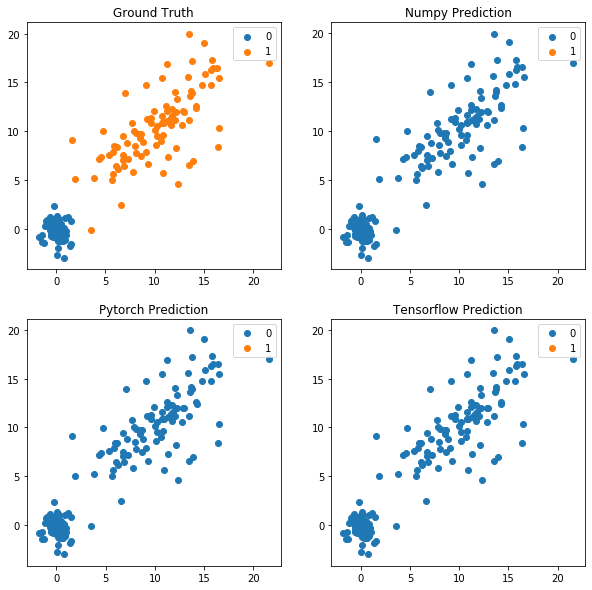

In [181]:
# Learn model
# learn_numpy()
learn_torch()
# learn_tf()

# Get prediction and plot
accuracy_numpy, predicted_numpy = predict_numpy(A_test_numpy[L], Y_test_numpy)
# accuracy_torch, predicted_torch = predict_torch(A_test_torch[L], Y_test_torch)
# accuracy_tf, predicted_tf = predict_tf(A_test_tf[L], Y_test_tf)

plot_prediction(X_test, Y_test, predicted_numpy, predicted_torch, predicted_tf)